In [1]:
# Import the pandas library
import pandas as pd 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file "Mall_Customers.csv" into a pandas DataFrame named "data"
data = pd.read_csv(r"C:\Users\user\Downloads\data\Mall_Customers.csv")

In [3]:
# Display the first few rows of the DataFrame "data"
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:

# Create a new DataFrame "input" by dropping the "Gender" and "CustomerID" columns from the DataFrame "data"
input = data.drop(["Gender", "CustomerID"], axis=1, inplace=False)

In [5]:
input.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [6]:
# Create a StandardScaler object
scale = StandardScaler()

# Scale the features of the "input" DataFrame
features = scale.fit_transform(input)

In [7]:
k_rng = range(1, 10)# Define the range of values for the number of clusters
sse = []
for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit(features)
    sse.append(km.inertia_)

C:\Users\user\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less ch

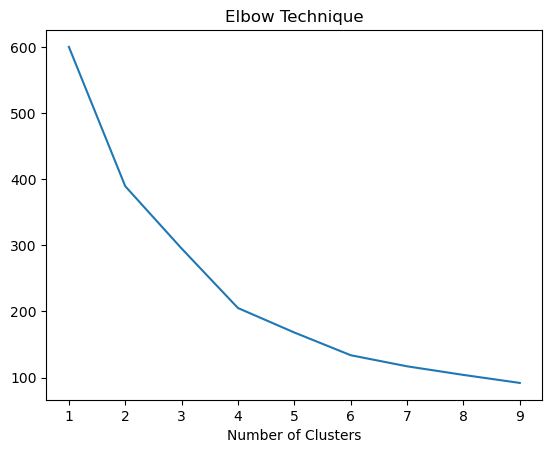

In [8]:
# Plot the SSE values against the number of clusters
plt.plot(k_rng, sse)
plt.xlabel("Number of Clusters")
plt.title("Elbow Technique")
plt.show()

In [9]:
# Set the desired number of clusters
k = 4
kmeans = KMeans(n_clusters=k)
# Add a 'cluster' column to the "input" DataFrame with the predicted cluster labels
input['cluster'] = kmeans.fit_predict(features)

C:\Users\user\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
kmeans.cluster_centers_


array([[-0.96249203, -0.78476346,  0.39202966],
       [ 1.08616125, -0.49056525, -0.39717443],
       [ 0.03720536,  0.99011499, -1.18875705],
       [-0.42880597,  0.97484722,  1.21608539]])

In [11]:
input

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,0
1,21,15,81,0
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,3
196,45,126,28,2
197,32,126,74,3
198,32,137,18,2


Text(0.5, 1.0, 'Age vs Annual Income')

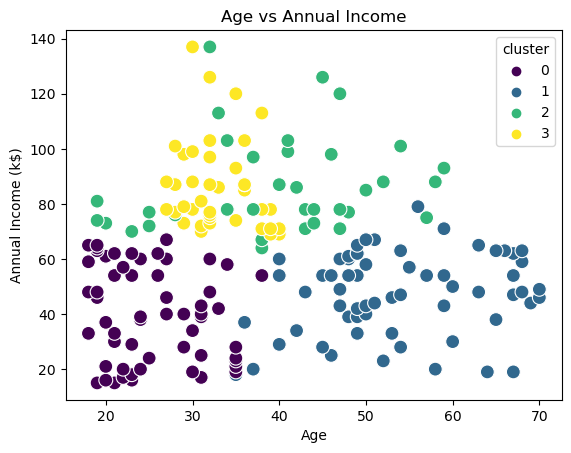

In [12]:
# plt.scatter(x ='Age', y = 'Annual Income (k$)', data = input)
sns.scatterplot(x = 'Age', y =  'Annual Income (k$)', hue= 'cluster' , data= input ,palette = 'viridis', s = 100)
plt.title('Age vs Annual Income')

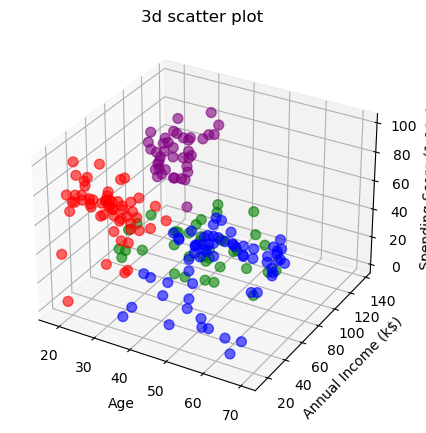

In [13]:
fig = plt.figure(figsize=(8, 5))  # Increase the figure size (width=8, height=6)
D = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green', 'purple']  # List of four different colors

for i, color in enumerate(colors):
    subset = input[input['cluster'] == i]  #'Cluster' column indicating different groups
    D.scatter(subset['Age'], subset['Annual Income (k$)'], subset['Spending Score (1-100)'],
              c=color, s=50, alpha=0.6)

D.set_xlabel('Age')
D.set_ylabel('Annual Income (k$)')
D.set_zlabel('Spending Score (1-100)')
plt.title('3d scatter plot')
plt.show()

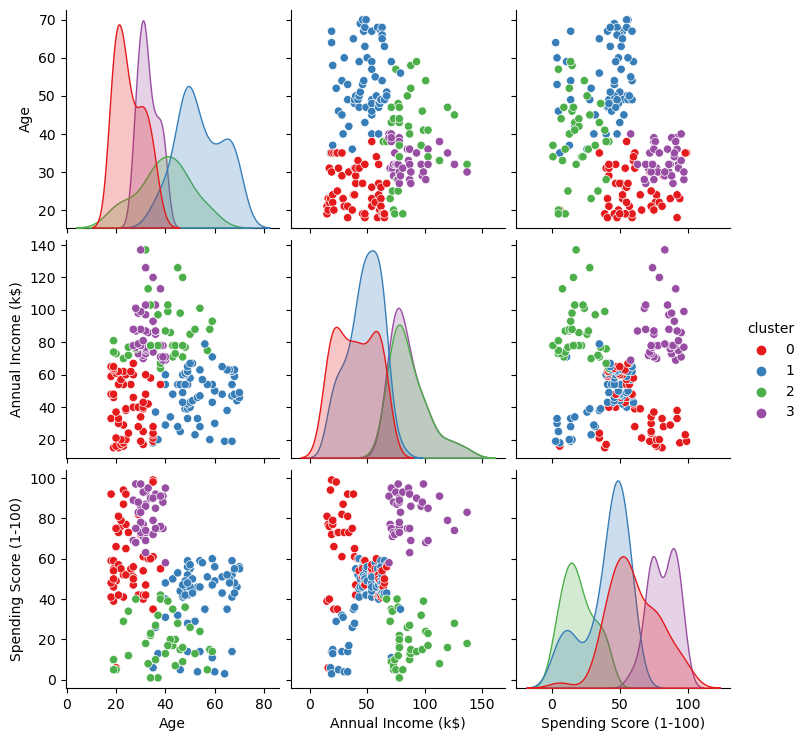

In [14]:
#pairplot for clusters
sns.pairplot(data=input, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='cluster', palette='Set1')
plt.show()